In [15]:
%pip install pyxlsb
%pip install python-calamine
%pip install xlrd


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 96.6/96.6 kB 2.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [27]:
print(df.isnull().sum())
print(df.info())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 n

In [36]:
print(df.describe().T)

                  count          mean           std          min  \
Order            2930.0  1.465500e+03  8.459625e+02          1.0   
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total Bsmt SF    2929.0  1.051615e+03  4.406151e

In [52]:
df.isnull().sum().sort_values(ascending=False)

Electrical        1
Order             0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [55]:
cat_fill = ["Pool QC", "Misc Feature", "Alley", "Fence", "Mas Vnr Type"]
for col in cat_fill:
    df[col] = df[col].fillna("None")

In [54]:
from sklearn.impute import SimpleImputer

# numeric fill with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [53]:
df["Fireplace Qu"] = df["Fireplace Qu"].fillna("None")

# Garage features → missing means no garage
df["Garage Type"]   = df["Garage Type"].fillna("None")
df["Garage Finish"] = df["Garage Finish"].fillna("None")
df["Garage Qual"]   = df["Garage Qual"].fillna("None")
df["Garage Cond"]   = df["Garage Cond"].fillna("None")
# Basement features → missing means no basement
df["Bsmt Exposure"]   = df["Bsmt Exposure"].fillna("None")
df["BsmtFin Type 1"]  = df["BsmtFin Type 1"].fillna("None")
df["BsmtFin Type 2"]  = df["BsmtFin Type 2"].fillna("None")
df["Bsmt Qual"]       = df["Bsmt Qual"].fillna("None")
df["Bsmt Cond"]       = df["Bsmt Cond"].fillna("None")


<Axes: >

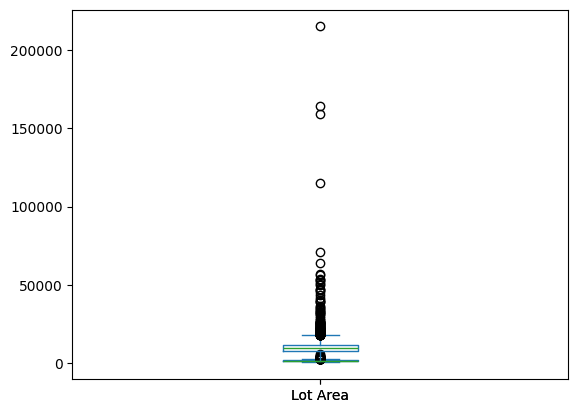

In [60]:
df['Gr Liv Area'].plot(kind='box')
df['Lot Area'].plot(kind='box')

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
df = pd.get_dummies(df, drop_first=True)

In [74]:
# --- Imports for modeling and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error


# --- Reload raw data to avoid earlier in-notebook transformations (keep read_csv as requested)
df_raw = pd.read_csv("AmesHousing.xls")
df_raw.shape
df_raw.head()


# --- Define features/target and a clean train/test split
X = df_raw.drop('SalePrice', axis=1)
y = df_raw['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


# --- Build preprocessing pipelines (impute + scale numeric, impute + one-hot categorical)
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
if 'SalePrice' in num_features:
    num_features.remove('SalePrice')
cat_features = X.select_dtypes(include=['object']).columns.tolist()

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
], remainder='drop')

# Fit preprocessor quickly on training data so downstream code can inspect names/shape
preprocessor.fit(X_train)


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [71]:
# --- Pipelines for models
pipe_lr = Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())])
pipe_ridge = Pipeline([('preprocessor', preprocessor), ('model', Ridge())])
pipe_lasso = Pipeline([('preprocessor', preprocessor), ('model', Lasso(max_iter=10000))])

alphas = np.logspace(-3, 3, 13)
param_ridge = {'model__alpha': alphas}
param_lasso = {'model__alpha': alphas}

gs_ridge = GridSearchCV(pipe_ridge, param_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gs_lasso = GridSearchCV(pipe_lasso, param_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# --- Fit OLS directly
print('Fitting OLS...')
pipe_lr.fit(X_train, y_train)

# --- Fit Ridge and Lasso with CV (may take some time)
print('Tuning Ridge (GridSearchCV)...')
gs_ridge.fit(X_train, y_train)
print('Tuning Lasso (GridSearchCV)...')
gs_lasso.fit(X_train, y_train)

best_ridge = gs_ridge.best_estimator_
best_lasso = gs_lasso.best_estimator_

print("Best Ridge alpha:", gs_ridge.best_params_)
print("Best Lasso alpha:", gs_lasso.best_params_)


Fitting OLS...
Tuning Ridge (GridSearchCV)...
Tuning Lasso (GridSearchCV)...
Tuning Lasso (GridSearchCV)...
Best Ridge alpha: {'model__alpha': np.float64(10.0)}
Best Lasso alpha: {'model__alpha': np.float64(100.0)}
Best Ridge alpha: {'model__alpha': np.float64(10.0)}
Best Lasso alpha: {'model__alpha': np.float64(100.0)}


             r2          rmse           mae
model                                      
OLS    0.894146  29132.317480  15710.446326
Ridge  0.895084  29002.924304  16486.841992
Lasso  0.897332  28690.570688  16161.627933


<Figure size 1200x600 with 0 Axes>

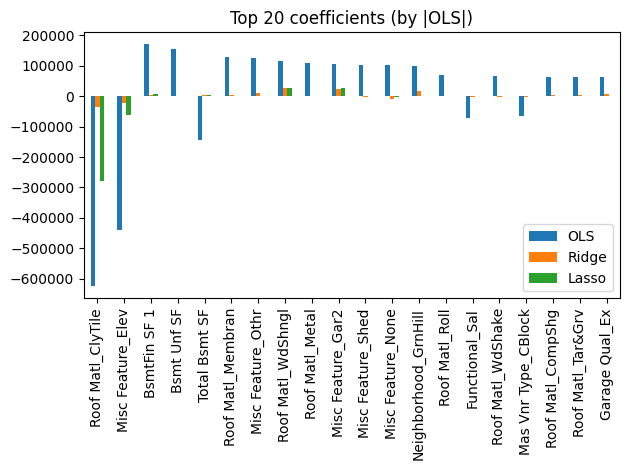

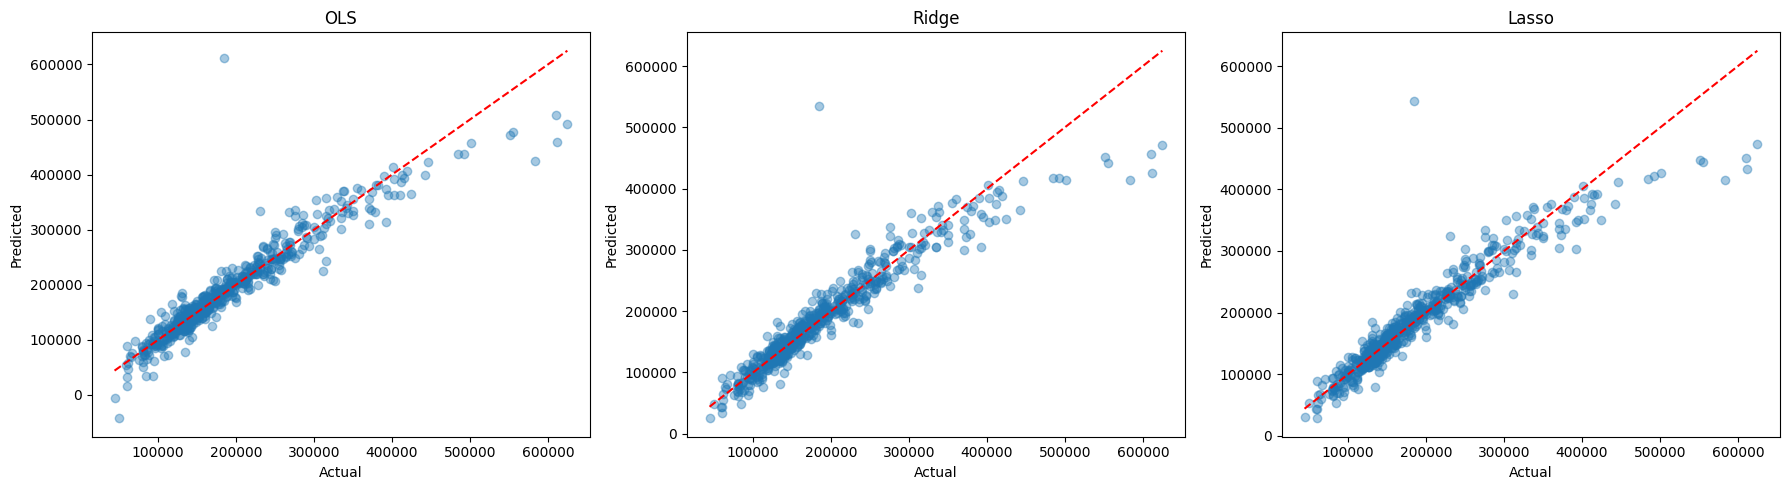

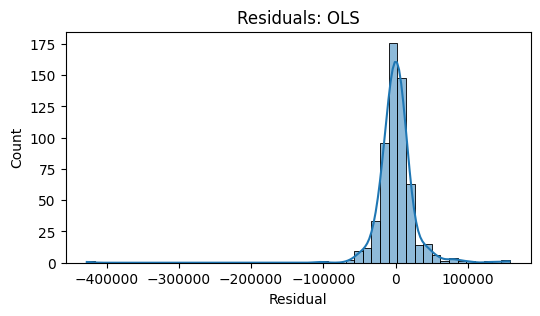

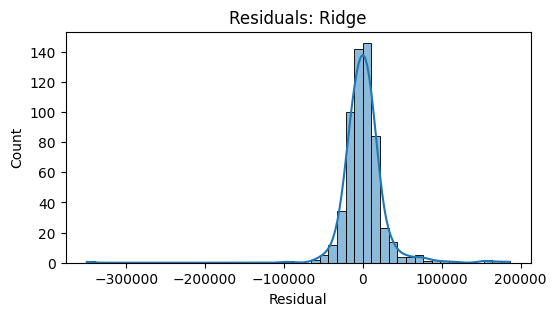

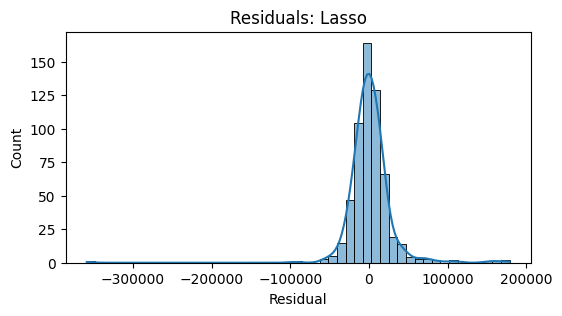

Lasso zeros: 208 of 317


In [75]:
# --- Evaluate models on test set
models = {'OLS': pipe_lr, 'Ridge': best_ridge, 'Lasso': best_lasso}
rows = []
for name, m in models.items():
    y_pred = m.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rows.append({'model': name, 'r2': r2, 'rmse': rmse, 'mae': mae})

results = pd.DataFrame(rows).set_index('model')
print(results)

# --- Extract feature names after preprocessing

def get_feature_names(preprocessor, num_features, cat_features):
    cat_ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_names = cat_ohe.get_feature_names_out(cat_features)
    return list(num_features) + list(cat_names)

fitted_pre = preprocessor  # already fitted earlier on X_train
feat_names = get_feature_names(fitted_pre, num_features, cat_features)

coeff_df = pd.DataFrame(index=feat_names)
coeff_df['OLS'] = pipe_lr.named_steps['model'].coef_
coeff_df['Ridge'] = best_ridge.named_steps['model'].coef_
coeff_df['Lasso'] = best_lasso.named_steps['model'].coef_
coeff_df['abs_OLS'] = coeff_df['OLS'].abs()
coeff_df = coeff_df.sort_values('abs_OLS', ascending=False)

# show top 20 coefficients
coeff_df.head(20)

# --- Plot top 20 coefficients
plt.figure(figsize=(12,6))
coeff_df.head(20)[['OLS','Ridge','Lasso']].plot(kind='bar')
plt.title('Top 20 coefficients (by |OLS|)')
plt.tight_layout()

# --- Actual vs Predicted plots
fig, axes = plt.subplots(1, 3, figsize=(18,5))
for ax, (name, m) in zip(axes, models.items()):
    y_pred = m.predict(X_test)
    ax.scatter(y_test, y_pred, alpha=0.4)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    ax.set_title(name)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
plt.tight_layout()

# --- Residual distributions
for name,m in models.items():
    res = y_test - m.predict(X_test)
    plt.figure(figsize=(6,3))
    sns.histplot(res, kde=True)
    plt.title(f'Residuals: {name}')
    plt.xlabel('Residual')
    plt.show()

# --- How many coefficients Lasso zeroed out?
print("Lasso zeros:", (coeff_df['Lasso'] == 0).sum(), "of", len(coeff_df))
